In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import uproot4
import pandas as pd

In [3]:
file_cv = uproot4.open("E:/score/run1_NuMI_CV_sp_score.root")
tree_cv = file_cv["events;1"]

file_dirt = uproot4.open("E:/score/run1_dirt_NuMI_sp_weights_full_set_score.root")
tree_dirt = file_dirt["events;1"]

file_ext = uproot4.open("E:/score/run1_NuMI_ext_full_set_sp_score.root")
tree_ext = file_ext["events;1"]
weight_cv=0.542162
weight_dirt=(2e20*0.75) / 1.67392e+21
weight_ext=1.002727292

bdt_cv = tree_cv['bdt_score'].array(library='ak')
bdt_dirt = tree_dirt['bdt_score'].array(library='ak')
bdt_ext = tree_ext['bdt_score'].array(library='ak')

BDT_CV = []
BDT_DIRT=[]
BDT_EXT=[]

BDT_CV1 = []
BDT_DIRT1=[]
BDT_EXT1=[]

for b in bdt_cv:
    BDT_CV.append(b)

    
for b in bdt_dirt:
    BDT_DIRT.append(b)

    
for b in bdt_ext:
    BDT_EXT.append(b)


for b in bdt_cv:
    if b >= 0.5:
        BDT_CV1.append(b)

for b in bdt_dirt:
    if b >= 0.5:
        BDT_DIRT1.append(b)

for b in bdt_ext:
    if b >= 0.5:
        BDT_EXT1.append(b)

print('cv = ',len(BDT_CV1)/len(BDT_CV))
print('dirt = ',len(BDT_DIRT1)/len(BDT_DIRT))
print('ext = ',len(BDT_EXT1)/len(BDT_EXT))

bdt_c=np.array(BDT_CV)
bdt_d=np.array(BDT_DIRT)
bdt_e=np.array(BDT_EXT)





cv =  0.23971518987341772
dirt =  0.22041480276535177
ext =  0.13333333333333333


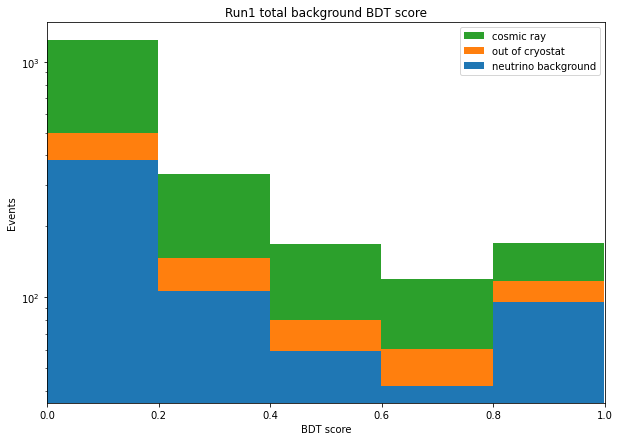

cv =  0.2397151898734188
dirt =  0.2204148027653522
ext =  0.1333333333333342


In [4]:
tip=['neutrino background','out of cryostat','cosmic ray']
(counts_cv, bins_cv) = np.histogram(bdt_c, bins=1000, range = (0., 1.))
(counts_dirt, bins_dirt) = np.histogram(bdt_d, bins=1000, range = (0., 1.))
(counts_ext, bins_ext) = np.histogram(bdt_e, bins=1000, range = (0., 1.))
we=[weight_cv*counts_cv,weight_dirt*counts_dirt,weight_ext*counts_ext]
bis=[bins_cv[:-1],bins_dirt[:-1],bins_ext[:-1]]
plt.figure(figsize=(10,7))
plt.xlim(0.,1.)
plt.xlabel('BDT score')
plt.ylabel(r'Events')
#plt.text(0.4,30000,'MicroBooNE simulation',fontsize=20)
plt.title('Run1 total background BDT score')
plt.hist(bis,bins=5,weights=we,stacked='ture',label=tip,histtype='stepfilled',log=True)
plt.legend()
plt.show()

BDT_CV1 = []
BDT_DIRT1=[]
BDT_EXT1=[]

for w,b in zip(we[0],bins_cv):
    if b >= 0.5:
        BDT_CV1.append(w)

for w,b in zip(we[1],bins_dirt):
    if b >= 0.5:
        BDT_DIRT1.append(w)

for w,b in zip(we[2],bins_ext):
    if b >= 0.5:
        BDT_EXT1.append(w)

print('cv = ',sum(BDT_CV1)/sum(we[0]))
print('dirt = ',sum(BDT_DIRT1)/sum(we[1]))
print('ext = ',sum(BDT_EXT1)/sum(we[2]))


In [5]:
cv = pd.read_csv('E:/score/csv/run1_NuMI_CV_sp_score.csv',usecols=['bdt_score'],dtype=np.float64)
cv_1=cv.to_numpy()
dirt = pd.read_csv('E:/score/csv/run1_dirt_NuMI_sp_weights_full_set_score.csv',usecols=['bdt_score'],dtype=np.float64)
dirt_1=dirt.to_numpy()
ext = pd.read_csv('E:/score/csv/run1_NuMI_ext_full_set_sp_score.csv',usecols=['bdt_score'],dtype=np.float64)
ext_1=ext.to_numpy()
dt = pd.read_csv('E:/score/csv/df_trident_0.05_score_test.csv',usecols=['bdt_score'],dtype=np.float64)
dt_1=dt.to_numpy()
weight_dt=(2e+20)/(1.5E+24*0.248)

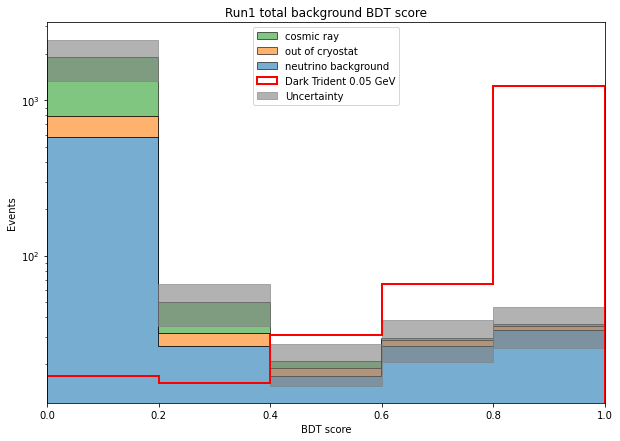

dt =  [0.01666667 0.01505376 0.03064516 0.0655914  1.23494624]


In [7]:
tip=['neutrino background','out of cryostat','cosmic ray']
(counts_cv, bins_cv) = np.histogram(cv_1, bins=1000, range = (0., 1.))
(counts_dirt, bins_dirt) = np.histogram(dirt_1, bins=1000, range = (0., 1.))
(counts_ext, bins_ext) = np.histogram(ext_1, bins=1000, range = (0., 1.))
(counts_dt, bins_dt) = np.histogram(dt_1, bins=5, range = (0., 1.))


(counts_1, bins_1) = np.histogram(cv_1, bins=5, range = (0., 1.))
(counts_2, bins_2) = np.histogram(dirt_1, bins=5, range = (0., 1.))
(counts_3, bins_3) = np.histogram(ext_1, bins=5, range = (0., 1.))

err=counts_1*weight_cv+counts_2*weight_dirt+counts_3*weight_ext


#(counts_err, bins_err) = np.histogram(err, bins=5, range = (0., 1.))

we=[weight_cv*counts_cv,weight_dirt*counts_dirt,weight_ext*counts_ext]
bis=[bins_cv[:-1],bins_dirt[:-1],bins_ext[:-1]]
plt.figure(figsize=(10,7))
plt.xlim(0.,1.)
plt.xlabel('BDT score')
plt.ylabel(r'Events')
#plt.text(0.4,30000,'MicroBooNE simulation',fontsize=20)
plt.title('Run1 total background BDT score')
plt.hist(bis,bins=5,weights=we,stacked='ture',label=tip,histtype='stepfilled',log=True,alpha=0.6,edgecolor='k')
plt.hist(bins_dt[:-1],bins_dt,weights=counts_dt*weight_dt*1000,lw=2,histtype='step',color='Red',label='Dark Trident 0.05 GeV')
x=[[0,0.199],[0.1999,0.4],[0.4,0.6],[0.6,0.8],[0.8,1.0]]
w1=err*0.7
w2=err*1.3
plt.fill_between(x[0], w1[0], w2[0], alpha=0.6,interpolate=False,color='grey',label='Uncertainty')
plt.fill_between(x[1], w1[1], w2[1], alpha=0.6,interpolate=False,color='grey')
plt.fill_between(x[2], w1[2], w2[2], alpha=0.6,interpolate=False,color='grey')
plt.fill_between(x[3], w1[3], w2[3], alpha=0.6,interpolate=False,color='grey')
plt.fill_between(x[4], w1[4], w2[4], alpha=0.6,interpolate=False,color='grey')


plt.legend(loc=9)
plt.show()
#print('cv = ',we[0])
#print('dirt = ',we[1])
#print('ext = ',we[2])
print('dt = ',counts_dt*weight_dt)